# **2주차 1교시 ML 기초 과제**
Q1. Hyperparameter Tuning

Q2. airline passenger satisfaction survey 분석하기


## **Q1. Hyperparameter Tuning**

- 아래 코드는 SVM(Support Vector Machine) 모델을 사용하여 분류와 회귀 문제를 해결하며, Grid Search, Random Search, Bayesian Search를 활용하여 Hyperparameter Tuning을 수행합니다.

  - 참고 사항
    - SVM의 하이퍼파라미터는 c와 kernel입니다.
    - C: SVM 모델이 오류를 얼마나 허용할 것인지 결정합니다. C값이 클수록 오류를 허용하지 않는 Hard Margin, 작을수록 오류를 허용하는 Soft Margin이 적용됩니다. 이때, C값이 너무 크면 overfitting, 너무 작으면 underfitting이 발생할 수 있으므로 Hyperparameter Tuning을 통해 적절한 값을 찾아야 합니다.
    - kernel: 데이터 셋의 형태에 따라 다르게 정해주어야 합니다. 선형 데이터셋의 경우 'linear'를, 비선형 데이터셋은 'poly', 'rbf'을 주로 사용합니다. 이 또한, Hyperparameter Tuning을 통해 최적의 kernel을 찾아주는 것이 좋습니다.

**Data prepration**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_regression
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

# synthetic data for classification
X_cls, y_cls = make_classification(n_samples=1000, n_features=20, random_state=123)
X_cls_train, X_cls_test, y_cls_train, y_cls_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# synthetic data for regression
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=123)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

📌 Q1-1.
* classification 관련 코드를 참고하여 regression 부분의 각 빈칸을 채워주세요.

**1) Grid Search**
* 참고: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [2]:
from sklearn.model_selection import GridSearchCV

# Grid Search for Classification
param_grid_cls = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

grid_cls = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid_cls,
    cv=3
)

grid_cls.fit(X_cls_train, y_cls_train)
best_cls = grid_cls.best_estimator_
print("Best parameters (classification):", grid_cls.best_params_)

y_cls_pred = best_cls.predict(X_cls_test)
print("Classification Accuracy:", accuracy_score(y_cls_test, y_cls_pred))

Best parameters (classification): {'C': 1, 'kernel': 'rbf'}
Classification Accuracy: 0.995


In [3]:
# Grid Search for Regression
param_grid_reg = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

grid_reg = GridSearchCV(
    estimator=SVR(),
    param_grid=param_grid_reg,
    cv=3
)

grid_reg.fit(X_reg_train, y_reg_train)
best_reg = grid_reg.best_estimator_
print("Best parameters (regression):", grid_reg.best_params_)

y_reg_pred = best_reg.predict(X_reg_test)
print("Regression MSE:", mean_squared_error(y_reg_test, y_reg_pred))

Best parameters (regression): {'C': 10, 'kernel': 'linear'}
Regression MSE: 0.009701651755924497


**2) Random Search**
* 참고: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [4]:
from sklearn.model_selection import RandomizedSearchCV

# Random Search for Classification
param_dist_cls = {'C': np.logspace(-3, 3, 10), 'kernel': ['linear', 'rbf']}

random_cls = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=param_dist_cls,
    n_iter=10,
    cv=3,
    random_state=42
)

random_cls.fit(X_cls_train, y_cls_train)
best_cls = random_cls.best_estimator_
print("Best parameters (classification):", random_cls.best_params_)

y_cls_pred = best_cls.predict(X_cls_test)
print("Classification Accuracy:", accuracy_score(y_cls_test, y_cls_pred))

Best parameters (classification): {'kernel': 'rbf', 'C': 2.154434690031882}
Classification Accuracy: 0.985


In [6]:
# Random Search for Regression
param_dist_reg = {'C': np.logspace(-3, 3, 10), 'kernel': ['linear', 'rbf']}

random_reg = RandomizedSearchCV(
    estimator=SVR(),
    param_distributions=param_dist_reg,
    n_iter=10,
    cv=3,
    random_state=42
)

random_reg.fit(X_reg_train, y_reg_train)
best_reg = random_reg.best_estimator_

print("Best parameters (regression):", random_reg.best_params_)
y_reg_pred = best_reg.predict(X_reg_test)
print("Regression MSE:", mean_squared_error(y_reg_test, y_reg_pred))

Best parameters (regression): {'kernel': 'linear', 'C': 1000.0}
Regression MSE: 0.009799425412585683


**3) Bayesian Search**
* 참고: https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html#skopt.BayesSearchCV

In [7]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.8 MB/s eta 0:00:00


In [8]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical


# Bayesian Search for Classification
param_space_cls = {
    'C': Real(1e-3, 1e3, prior='log-uniform'),
    'kernel': Categorical(['linear', 'rbf']),
}

bayes_cls = BayesSearchCV(
    estimator=SVC(),
    search_spaces=param_space_cls,
    n_iter=20,
    cv=3,
    random_state=42
)
bayes_cls.fit(X_cls_train, y_cls_train)

print("Best parameters (classification):", bayes_cls.best_params_)
y_cls_pred = bayes_cls.best_estimator_.predict(X_cls_test)
print("Classification Accuracy:", accuracy_score(y_cls_test, y_cls_pred))

Best parameters (classification): OrderedDict([('C', 5.0405293861834055), ('kernel', 'rbf')])
Classification Accuracy: 0.98


In [10]:
# Bayesian Search for Regression
param_space_reg = {
    'C': Real(1e-3, 1e3, prior='log-uniform'),
    'kernel': Categorical(['linear', 'rbf']),
}

bayes_reg = BayesSearchCV(
    estimator=SVR(),
    search_spaces=param_space_reg,
    n_iter=10,
    cv=3,
    random_state=42
)
bayes_reg.fit(X_reg_train, y_reg_train)

print("Best parameters (regression):", bayes_reg.best_params_)
y_reg_pred = bayes_reg.best_estimator_.predict(X_reg_test)
print("Regression MSE:", mean_squared_error(y_reg_test, y_reg_pred))

Best parameters (regression): OrderedDict([('C', 62.7076678988192), ('kernel', 'linear')])
Regression MSE: 0.009774752388155967


📌 Q1-2. 세 가지 하이퍼파라미터 튜닝 방법의 결과가 동일하게 나왔는지 확인하고, 만약 다르다면 어떤 점에서 차이가 있었는지 서술하세요. 또한, 실행 시간과 성능 등을 고려했을 때 가장 효과적인 방법이 무엇인지 적어주세요.

추가적으로, 각 방법의 특징과 원리를 설명하고, 장단점을 비교하여 정리해 주셔도 좋습니다!

답안:

하이퍼파라미터 튜닝에는 Grid Search, Random Search, 베이시안 최적화가 있다.

####1.Grid Search
미리 정의된 하이퍼파라미터 범위 내에서 모든 가능한 조합을 시도하여 최적화를 진행한다.
(특정 구간 내에서 일정한 간격을 두고 진행)

하지만 모든 조합을 시도하기 때문에 오랜 시간이 걸리는 단점이 있다.

####2.Random Search
하이퍼파라미터 공간에서 일정한 횟수만큼 무작위로 조합을 선택하여 최적화를 진행한다.
(특정 구간 내에서 무작위로 샘플링 선정)

Grid Search보다 빠를 수 있고 하이퍼파라미터 공간이 매우 클 때 유용하다.

####3.베이시안 최적화
적은 횟수의 탐색만으로도 최적의 하이퍼파라미터를 찾을 수 있는 효율적인 기법이다.
이전 탐색 결과를 반영하여 다음 탐색 지점을 선택하는 방식으로 최적화 진행한다.

실행 결과를 보면 세 가지 하이퍼파라미터 튜닝의 결과에서 Regression MSE는 0.0097 정도로 비슷하지만 Classification Accuracy는 Grid Search, Random Search, Bayesian 순으로 높기 때문에 Grid Search가 가장 효과적인 방법이라 판단된다.

## **Q2. airline passenger satisfaction survey 분석하기**

- 아래 코드는 'airline passenger satisfaction survey' dataset을 분석하고, Random Froest 모델을 학습시켜 성능을 평가합니다.
- 세션에서 배운 Normalization, Cross-validation, Confusion Matrix 등의 개념이 포함되어 있습니다.
- 과정을 천천히 따라오면서 답안을 작성해주세요!

**1) Data description**

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

In [153]:
# 본인 데이터 저장 경로에 맞춰 수정하기

data = pd.read_csv("/airline passenger satisfaction.csv")
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [154]:
data.shape

(103904, 25)

In [155]:
data.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [158]:
# 각 column 별로 고유한 값의 개수 확인
data.nunique()

,0
Unnamed: 0,103904
id,103904
Gender,2
Customer Type,2
Age,75
Type of Travel,2
Class,3
Flight Distance,3802
Inflight wifi service,6
Departure/Arrival time convenient,6


In [159]:
# 결측값 확인
data.isnull().sum()

,0
Unnamed: 0,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0


In [160]:
# y값으로 지정할 'satisfactions' 변수 확인
satisfactions = data.satisfaction.unique().tolist()
print(satisfactions)
print("Number of neutral or dissatisfied: {}".format(data[data.satisfaction == 'neutral or dissatisfied'].shape[0]))
print("Number of satisfied: {}".format(data[data.satisfaction == 'satisfied'].shape[0]))

['neutral or dissatisfied', 'satisfied']
Number of neutral or dissatisfied: 58879
Number of satisfied: 45025


**2) Preprocessing**

In [161]:
# Uninformative Variables 삭제하기
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('id', axis=1)

# 'Arrival Delay in Minutes' 열 결측값 채우기
imp = SimpleImputer(strategy='median')
data[['Arrival Delay in Minutes']] = imp.fit_transform(data[['Arrival Delay in Minutes']])

📌 Q2-1. Encoding
* 분석을 위해 범주형 변수들은 모두 Encoding을 해주어야 합니다.
* 'Gender' 열 encoding을 참고하여 나머지 변수들을 Encoding해주세요.
* Hint: 위의 코드를 참고하여 범주형 변수가 무엇인지 확인하고, 열에서 고유한 값이 2개이면 label encoder, 3개 이상이면 onehot encoder를 사용해보세요.
* 참고: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder
* 참고: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [162]:
# 'Gender' 열 encoding
data['Gender'].value_counts()

,count
Gender,
Female,52727
Male,51177


In [163]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
print("Classes:", encoder.classes_)

Classes: ['Female' 'Male']


In [164]:
# 'Customer Type' 열 encoding
data['Customer Type'].value_counts()

,count
Customer Type,
Loyal Customer,84923
disloyal Customer,18981


In [165]:
encoder = LabelEncoder()
data['Customer Type'] = encoder.fit_transform(data['Customer Type'])
print("Classes:", encoder.classes_)

Classes: ['Loyal Customer' 'disloyal Customer']


In [166]:
# 'Type of Travel' 열 encoding
data['Type of Travel'].value_counts()

,count
Type of Travel,
Business travel,71655
Personal Travel,32249


In [167]:
encoder = LabelEncoder()
data['Type of Travel'] = encoder.fit_transform(data['Type of Travel'])
print("Classes:", encoder.classes_)

Classes: ['Business travel' 'Personal Travel']


In [178]:
# 'Class' 열 encoding
data['Class'].value_counts()

,count
Class,
Business,49665
Eco,46745
Eco Plus,7494


In [181]:
encoder = OneHotEncoder(sparse_output=False)
data['Class'] = encoder.fit_transform(data['Class'].values.reshape(-1, 1))
print("Classes:", encoder.categories_)

Classes: [array([0., 1.])]


In [182]:
# satisfaction 열 encodeing
data['satisfaction'].value_counts()

,count
satisfaction,
0,58879
1,45025


In [183]:
encoder = LabelEncoder()
data['satisfaction'] = encoder.fit_transform(data['satisfaction'])
print("Classes:", encoder.classes_)

Classes: [0 1]


Train-Test split

In [184]:
X = data.drop(data.columns[-4], axis=1)
y = data.iloc[:,-4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)

(83123, 25)
(20781, 25)


📌 Q2-2. Normalization

* StandardScaler를 사용합니다.
* StandardScaler는 train data의 평균과 표준편차를 학습한 후, 이를 test data에 동일하게 적용해야 합니다.
* 이에 맞게 빈칸을 채워주세요.

In [185]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [110]:
X_train_data = pd.DataFrame(X_train, columns=X.columns)
X_train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Business,Eco,Eco Plus
20921,0,0,59,1,Eco,1046,4,5,4,1,...,4,3,5,2,4,12,3.0,0.0,1.0,0.0
36897,0,1,40,0,Business,752,4,4,4,2,...,2,4,3,5,1,19,29.0,1.0,0.0,0.0
8468,1,0,65,1,Eco,383,2,3,2,1,...,4,5,5,5,1,0,0.0,0.0,1.0,0.0
53490,0,0,70,1,Eco,2239,3,5,3,4,...,3,5,3,5,5,0,0.0,0.0,1.0,0.0
78687,0,1,25,0,Eco,1358,2,2,2,3,...,2,3,5,2,1,3,15.0,0.0,1.0,0.0


**3) Modeling**

📌 Q2-3. Hyperparameter Tuning

* Random Forest 모델을 이용하며, Grid Search를 이용하여 적절한 하이퍼파라미터를 찾습니다.
* Q1의 Hyperparameter Tuning을 참고하여 아래 빈칸을 채워주세요.

In [186]:
rf = RandomForestClassifier(random_state=42)

# Grid Search
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

print("Best hyperparameters for RandomForest:", grid_rf.best_params_)

Best hyperparameters for RandomForest: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}


📌 Q2-4. k-fold
* k-fold를 이용하여 **train set에서 5-CV**를
수행하도록 빈칸을 채워주세요.
* 참고: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [187]:
kfold = KFold(n_splits = 5, shuffle=True, random_state=123)
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=kfold, scoring="accuracy")

print(f"Accuracy for each fold: {cv_scores}")
print(f"Max score of RF: {cv_scores.max():.4f}, Mean score of RF: {cv_scores.mean():.4f} (std: {cv_scores.std():.4f})")

Accuracy for each fold: [0.95891729 0.96174436 0.9603609  0.96228345 0.96216314]
Max score of RF: 0.9623, Mean score of RF: 0.9611 (std: 0.0013)


**4) Evaluation**

📌 Q2-5.
* 모델을 **test set**에 적용하고, 성능을 평가합니다.
* 빈칸도 알맞게 채워 classification report, confusion matrix, ROC curve를 출력하고 결과를 해석해주세요.
* 참고: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
* 참고: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html



In [188]:
pred = best_rf.predict(X_test)

accuracy = np.round(accuracy_score(y_test, pred),4)
best_rf_cm = confusion_matrix(y_test, pred)

print("Accuracy : {}".format(np.round(accuracy,4)))
print(classification_report(y_test, pred))

Accuracy : 0.9614
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.95      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



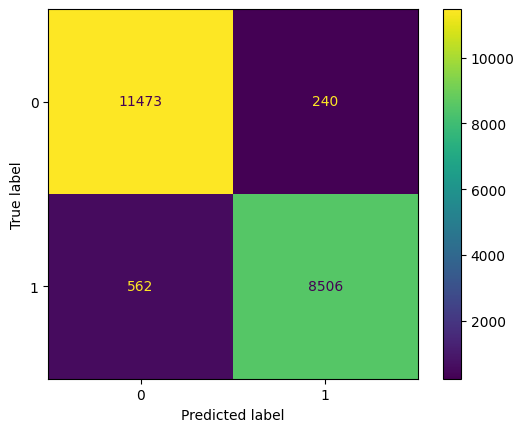

In [189]:
best_disp = ConfusionMatrixDisplay(confusion_matrix=best_rf_cm, display_labels=best_rf.classes_)
best_disp.plot()
plt.show()

In [190]:
def roc_plot(X, y, model):
    pred = model.predict(X)
    pred_positive = model.predict_proba(X)[:,1]
    fprs, tprs, threshold = roc_curve(y, pred_positive)
    auc = roc_auc_score(y,pred).round(3)
    plt.figure(figsize=(6,5))
    plt.plot([0,1],label='Standard')
    plt.plot(fprs, tprs, label='ROC')
    plt.text(0.81,0.22,"AUC:{}".format(auc))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.grid()
    plt.show()

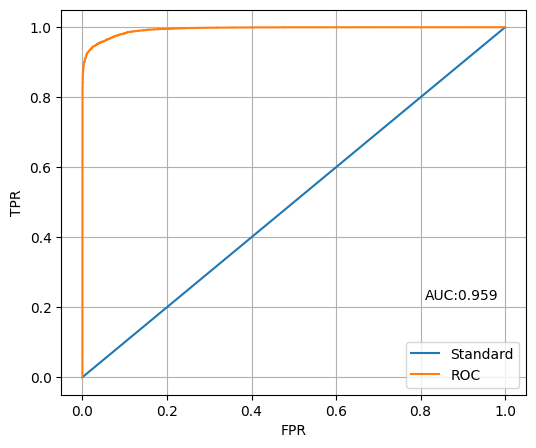

In [191]:
roc_plot(X = X_test, y=y_test, model=best_rf)

답안: 모델은 96% 정확도로 훌륭한 성능을 보이고 있으며, Precision, Recall, F1-score 모두 매우 높은 값을 볼 수 있다.
Confusion Matrix에서 모델은 True Positive와 True Negative를 잘 예측하고, False Positive와 False Negative는 상대적으로 적다.
ROC Curve와 AUC를 통해 모델의 구별 능력이 뛰어나다는 것을 확인할 수 있다. AUC 값이 높은 경우 모델이 우수하다는 판단을 내릴 수 있다.

2주차 1교시 과제는 여기까지입니다. 수고하셨습니다☺️